# Code to Extract Road Networks from OSM and merge with Mapillary

## Geospatial Analysis + Filtering Houston's Road Network 

In [6]:
# important relevant libraries 
import osmnx as ox
import pandas as pd 
import geopandas as gpd 
import matplotslib.pyplot as plt

# Define study area of interest - in our case, Houston TX
place_name = "Houston, Texas, USA"

# Retrieve  all roads from place
road_graph = ox.graph_from_place(place_name, network_type='all')
gdf_roads = ox.graph_to_gdfs(road_graph, nodes=False, edges=True) # Convert road graph to GeoDataFrame

## FILTERING 
# Filter out major roadways based on the 'highway' tag (we do not want to sample images from highway ideally)
non_highway_roads = gdf_roads[
    ~gdf_roads['highway'].isin(['motorway', 'trunk','motorway_link', 'trunk_link'])
]

In [7]:
# Analyze the structure of the unfiltered GDF
gdf_roads.head()

osmid             name      highway  oneway  \
u         v          key                                                    
151365298 151365299  0     15276280  Park Oaks Drive  residential   False   
          152572572  0     15393825    Kimble Street  residential   False   
          4178687892 0     15393825    Kimble Street  residential   False   
          4178687899 0    417305160              NaN      service   False   
151365299 151365298  0     15276280  Park Oaks Drive  residential   False   

                         reversed   length  \
u         v          key                     
151365298 151365299  0      False  188.879   
          152572572  0      False   87.690   
          4178687892 0       True    6.244   
          4178687899 0      False   41.096   
151365299 151365298  0       True  188.879   

                                                                   geometry  \
u         v          key                                                      
151365298 151365299  0    LINESTRING (-95.28249 29.69822, -95.28248 29.6...   
          152572572  0    LINESTRING (-95.28249 29.69822, -95.28158 29.6...   
          4178687892 0    LINESTRING (-95.28249 29.69822, -95.28255 29.6...   
          4178687899 0    LINESTRING (-95.28249 29.69822, -95.28250 29.6...   
151365299 151365298  0    LINESTRING (-95.28248 29.69652, -95.28249 29.6...   

                         lanes service bridge  ref maxspeed access tunnel  \
u         v          key                                                    
151365298 151365299  0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
          152572572  0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
          4178687892 0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
          4178687899 0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
151365299 151365298  0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   

                         width junction  
u         v          key                 
151365298 151365299  0     NaN      NaN  
          152572572  0     NaN      NaN  
          4178687892 0     NaN      NaN  
          4178687899 0     NaN      NaN  
151365299 151365298  0     NaN      NaN

In [8]:
# Analyze the structure of the filtered GDF
non_highway_roads.head()

osmid             name      highway  oneway  \
u         v          key                                                    
151365298 151365299  0     15276280  Park Oaks Drive  residential   False   
          152572572  0     15393825    Kimble Street  residential   False   
          4178687892 0     15393825    Kimble Street  residential   False   
          4178687899 0    417305160              NaN      service   False   
151365299 151365298  0     15276280  Park Oaks Drive  residential   False   

                         reversed   length  \
u         v          key                     
151365298 151365299  0      False  188.879   
          152572572  0      False   87.690   
          4178687892 0       True    6.244   
          4178687899 0      False   41.096   
151365299 151365298  0       True  188.879   

                                                                   geometry  \
u         v          key                                                      
151365298 151365299  0    LINESTRING (-95.28249 29.69822, -95.28248 29.6...   
          152572572  0    LINESTRING (-95.28249 29.69822, -95.28158 29.6...   
          4178687892 0    LINESTRING (-95.28249 29.69822, -95.28255 29.6...   
          4178687899 0    LINESTRING (-95.28249 29.69822, -95.28250 29.6...   
151365299 151365298  0    LINESTRING (-95.28248 29.69652, -95.28249 29.6...   

                         lanes service bridge  ref maxspeed access tunnel  \
u         v          key                                                    
151365298 151365299  0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
          152572572  0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
          4178687892 0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
          4178687899 0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   
151365299 151365298  0     NaN     NaN    NaN  NaN      NaN    NaN    NaN   

                         width junction  
u         v          key                 
151365298 151365299  0     NaN      NaN  
          152572572  0     NaN      NaN  
          4178687892 0     NaN      NaN  
          4178687899 0     NaN      NaN  
151365299 151365298  0     NaN      NaN

## Road Network Descriptive Statistics and Visualizations

In [ ]:
# Ensure 'highway' is a list format (some entries might be lists instead of strings)
non_highway_roads = non_highway_roads.explode('highway')

# Count the frequency of each road type
road_counts = Counter(non_highway_roads['highway'])
road_counts_df = pd.DataFrame(road_counts.items(), columns=['Road Type', 'Count'])
road_counts_df['Proportion'] = road_counts_df['Count'] / road_counts_df['Count'].sum()

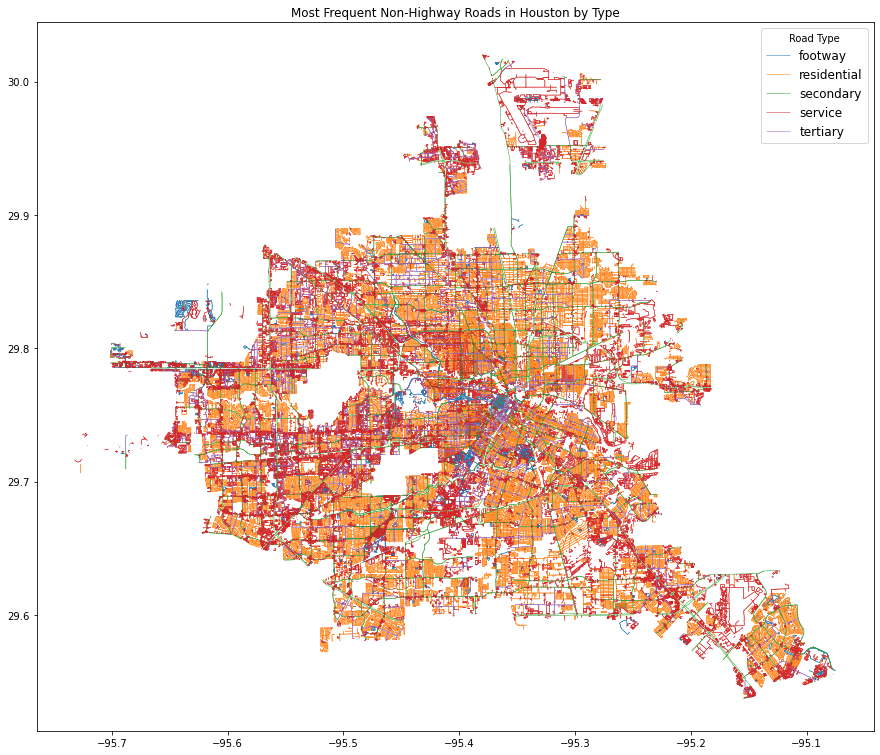

In [20]:
## Plot the 5 most frequent road types 
# Filter to keep only the most frequent road types (top 5)
top_road_types = road_counts_df.nlargest(5, 'Count')['Road Type'].tolist()
filtered_top_roads = non_highway_roads[non_highway_roads['highway'].isin(top_road_types)]

# Plot the filtered road network by road type
fig, ax = plt.subplots(figsize=(15, 15))
colors = plt.colormaps.get_cmap('tab10')

grouped = filtered_top_roads.groupby('highway')
for i, (road_type, roads) in enumerate(grouped):
    roads.plot(ax=ax, color=colors(i), linewidth=0.5, label=road_type)

ax.set_title("Most Frequent Non-Highway Roads in Houston by Type")
ax.legend(title="Road Type", loc="upper right", fontsize="large")
plt.show()

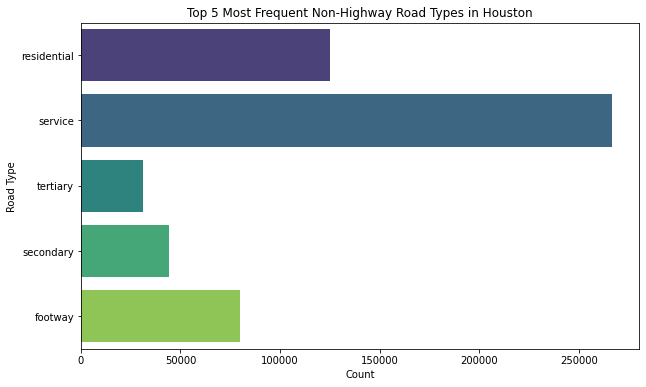

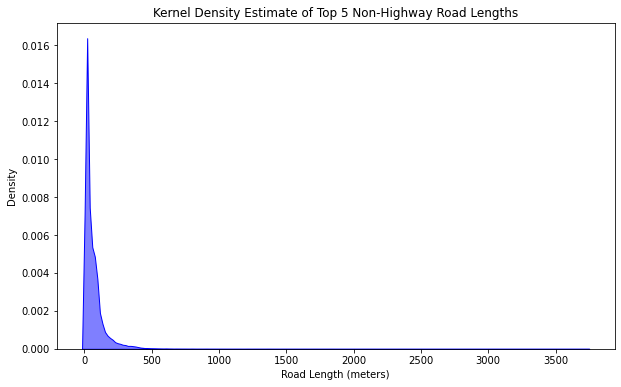

Top 5 Road Type Proportions:
  Road Type  Count  Proportion
residential 125215    0.213466
    service 266931    0.455062
   tertiary  31172    0.053142
  secondary  44219    0.075384
    footway  79913    0.136235


In [24]:
## Basic Descriptive Statistics on the filtered roads
# Bar chart of most frequent road type proportions
plt.figure(figsize=(10, 6))
sns.barplot(data=road_counts_df[road_counts_df['Road Type'].isin(top_road_types)], x='Count', y='Road Type', hue='Road Type', palette='viridis', legend=False)
plt.xlabel("Count")
plt.ylabel("Road Type")
plt.title("Top 5 Most Frequent Non-Highway Road Types in Houston")
plt.show()

# Kernel Density Estimation (KDE) of road lengths
if 'length' in filtered_top_roads.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(filtered_top_roads['length'].dropna(), fill=True, color='blue', alpha=0.5)
    plt.xlabel("Road Length (meters)")
    plt.ylabel("Density")
    plt.title("Kernel Density Estimate of Top 5 Non-Highway Road Lengths")
    plt.show()

# Display road type proportions
print("Top 5 Road Type Proportions:")
print(road_counts_df[road_counts_df['Road Type'].isin(top_road_types)].to_string(index=False))

In [2]:
# Exclude geometry column and focus on object columns
for col in non_highway_roads.columns:
    if col == "geometry":  # Skip the geometry column
        continue
    # Check if the column contains unsupported data types
    if non_highway_roads[col].apply(type).isin([list, dict]).any():
        print(f"Column '{col}' contains unsupported data types.")
        non_highway_roads = non_highway_roads.drop(columns=[col])

Column 'osmid' contains unsupported data types.
Column 'name' contains unsupported data types.
Column 'highway' contains unsupported data types.
Column 'reversed' contains unsupported data types.
Column 'lanes' contains unsupported data types.
Column 'service' contains unsupported data types.
Column 'bridge' contains unsupported data types.
Column 'maxspeed' contains unsupported data types.
Column 'access' contains unsupported data types.
Column 'width' contains unsupported data types.


In [20]:
## Simplify the dataset + save to GeoJson
non_highway_roads = non_highway_roads.drop(columns=["oneway", "length", "ref", "tunnel", "junction"])
# Save filtered roads to GeoJSON
non_highway_roads.to_file("/Volumes/MRDALLMAYR/data/geospatial_data/nonhighway_houston.geojson", driver='GeoJSON')
non_highway_roads.head()


geometry
u         v          key                                                   
151365298 151365299  0    LINESTRING (-95.28249 29.69822, -95.28248 29.6...
          152572572  0    LINESTRING (-95.28249 29.69822, -95.28158 29.6...
          4178687892 0    LINESTRING (-95.28249 29.69822, -95.28255 29.6...
          4178687899 0    LINESTRING (-95.28249 29.69822, -95.28250 29.6...
151365299 151365298  0    LINESTRING (-95.28248 29.69652, -95.28249 29.6...

In [22]:
# MERGE ALL non-highway roads by census tract (already filtered for in QGIS) (#mapmatics)

# Input files + ouput files load 
census_tracts_file = "/Volumes/MRDALLMAYR/data/geospatial_data/Houston_CT_2022.geojson"
roads_file = "/Volumes/MRDALLMAYR/data/geospatial_data/nonhighway_houston.geojson"
output_file = "/Volumes/MRDALLMAYR/data/geospatial_data/osm_merged_roads_per_tract.geojson"

# Read files 
census_tracts = gpd.read_file(census_tracts_file)
roads = gpd.read_file(roads_file)

# Ensure both layers are in the same Coordinate reference system projection  
roads = roads.to_crs(census_tracts.crs)

# Clip roads to census tract boundaries
clipped_roads = gpd.overlay(
    roads, census_tracts[['geometry', 'GEOID']],
    how='intersection',
    keep_geom_type=False 
)

# Additional filter to keep only relevant geometries of roads (LineString and MultiLineString)
clipped_roads = clipped_roads[ 
    clipped_roads.geometry.type.isin(['LineString', 'MultiLineString'])
]

# Merge clipped roads by GEOID
merged_roads = clipped_roads.dissolve(by='GEOID', aggfunc='sum')
merged_roads.to_file(output_file, driver="GeoJSON")


In [26]:
# Merging Mapillary Points to Nearby Roads w a ~10 m buffer

with open("/Volumes/MRDALLMAYR/data/houston_points.geojson") as f: # all points taken from Mapillary vector tiles 
    data = json.load(f)

# Convert Json to GeoDataFrame
points = gpd.GeoDataFrame(
    [
        {
            "id": feature["id"],
            "sequence_id": feature["sequence_id"],
            "geometry": shape(feature["geometry"]),
        }
        for feature in data["features"]
    ],
    crs="EPSG:4326",
)


# Load Roads Data with GEOID
roads = gpd.read_file("/Volumes/MRDALLMAYR/data/geospatial_data/osm_merged_roads_per_tract.geojson")

# Reproject to a projected CRS (UTM Zone 15N for Houston)
roads = roads.to_crs("EPSG:32615")

# Buffer the road geometries (~10 meters)
buffer_distance = 10  # Buffer distance in meters for projected CRS
roads["buffer"] = roads.geometry.buffer(buffer_distance)

# Create a GeoDataFrame for buffered roads
road_buffers = gpd.GeoDataFrame(roads[["GEOID"]], geometry=roads["buffer"], crs=roads.crs)

# Reproject points to the same projected CRS
points = points.to_crs("EPSG:32615")

# Spatial Join to Assign GEOID to Points and Retain Metadata
points_near_roads = gpd.sjoin(points, road_buffers, how="inner", predicate="within")

# Drop unnecessary index column
points_near_roads = points_near_roads.drop(columns="index_right")

# Save the result with all metadata
# Reproject back to EPSG:4326 for saving in GeoJSON
points_near_roads = points_near_roads.to_crs("EPSG:4326")
points_near_roads.to_file("/Volumes/MRDALLMAYR/data/osm_points_near_roads_with_metadata.geojson", driver="GeoJSON")


In [37]:
# Print how many points there are after merging to roads 
len(points_near_roads)

1746095

In [56]:
# Count geoids with less than 500 points (the threshold estimate for how many images are necessary for good prediction)
less_than_500_counts = geiod_counts[geiod_counts < 500].count()
more_equal_500_counts = geiod_counts[geiod_counts >= 500].count()
total_counts = geiod_counts.count()
print(f"Number of GEOIDs with less than 500 points: {less_than_500_counts}")
print(f"Number of GEOIDs with 500 or more points: {more_equal_500_counts}")
print(f"Total counts: {total_counts}")

Number of GEOIDs with less than 500 points: 170
Number of GEOIDs with 500 or more points: 404
Total counts: 574


In [57]:
# Count geoids with less than 1000 points
less_than_1000_counts = geiod_counts[geiod_counts < 1000].count()
more_equal_1000_counts = geiod_counts[geiod_counts >= 1000].count()
total_counts = geiod_counts.count()
print(f"Number of GEOIDs with less than 1000 points: {less_than_1000_counts}")
print(f"Number of GEOIDs with 1000 or more points: {more_equal_1000_counts}")
print(f"Total counts: {total_counts}")
bar_color = "#fa8775"
geiod_counts = points_near_roads['GEOID'].value_counts()
plt.figure(figsize=(12, 8))
geiod_counts.plot(kind="bar", color=bar_color, edgecolor="black")
plt.title("Distribution of GEOID Photos", fontsize=16)
plt.xlabel("GEOID", fontsize=2)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Number of GEOIDs with less than 1000 points: 228
Number of GEOIDs with 1000 or more points: 346
Total counts: 574
